In [1]:
import tensorflow as tf

2023-06-10 00:10:06.874722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Input, Conv2D, Dense, Flatten, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar_10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar_10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 
y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train.shape:", x_train.shape)
print("x_train.shape:", y_train.shape )

x_train.shape: (50000, 32, 32, 3)
x_train.shape: (50000,)


In [4]:
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [5]:
i  = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5797 - accuracy: 0.4218 - val_loss: 1.3357 - val_accuracy: 0.5127
Epoch 2/15
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2770 - accuracy: 0.5390 - val_loss: 1.1209 - val_accuracy: 0.5924
Epoch 3/15
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1434 - accuracy: 0.5917 - val_loss: 1.0448 - val_accuracy: 0.6251
Epoch 4/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0469 - accuracy: 0.6275 - val_loss: 0.9743 - val_accuracy: 0.6601
Epoch 5/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9712 - accuracy: 0.6521 - val_loss: 0.9724 - val_accuracy: 0.6507
Epoch 6/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9114 - accuracy: 0.6753 - val_loss: 0.9313 - val_accuracy: 0.6747
Epoch 7/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8651 - accuracy: 0.6903 - val_loss: 0.9038 -

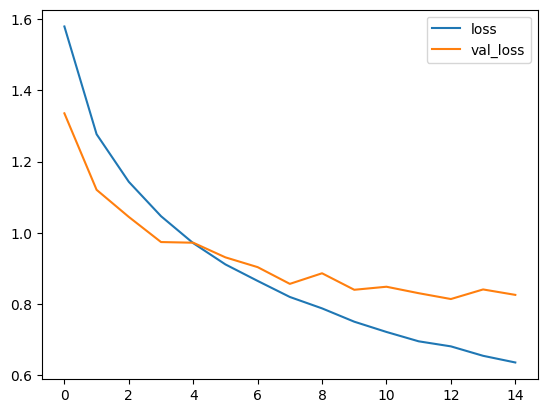

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()


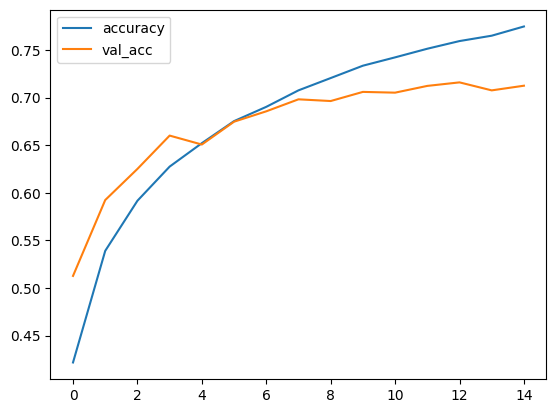

In [8]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 4s 11ms/step
confusion matrix without normalization
[[726  15  46  25  24  11  11  15  96  31]
 [ 13 826   3  17   8   5  11   3  32  82]
 [ 54   3 569  69  96 107  52  31  16   3]
 [ 20   6  50 485  72 246  55  36  17  13]
 [ 18   1  61  63 668  46  43  83  11   6]
 [  7   3  34 157  44 664  20  55  12   4]
 [  7   1  26  77  47  43 779   8   8   4]
 [ 11   0  18  41  47  79   3 792   1   8]
 [ 36  35  18  20  11   5   4   3 848  20]
 [ 29  84   6  30   6  13   8  22  34 768]]


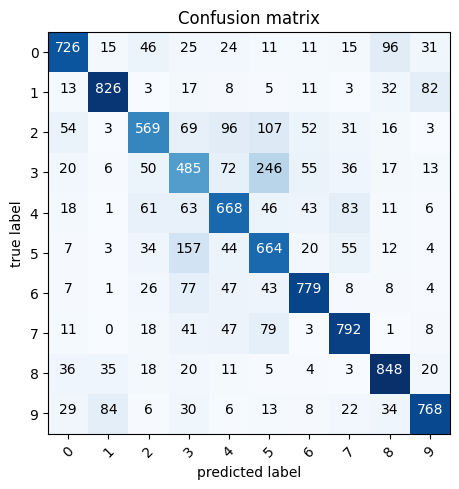

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment= 'center',
                 color = 'white' if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel('predicted label')
    plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
#label mapping

labels = '''airplane 
autombile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()